In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [3]:
class CIFAR10Dataset(Dataset):
    def __init__(self, train=True, transform=None):
        self.dataset = torchvision.datasets.CIFAR10(
            root='./data', train=train, download=True
        )
        self.transform = transform
        self.classes = self.dataset.classes

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        if self.transform:
            image = self.transform(image)
        return image, label



transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.5, 0.5, 0.5),
        std=(0.5, 0.5, 0.5))
])

# Create datasets
train_dataset = CIFAR10Dataset(train=True, transform=transform)
test_dataset = CIFAR10Dataset(train=False, transform=transform)


# Visualize a sample
sample_image, sample_label = train_dataset[0]
print(f"Image shape: {sample_image.shape}, Label: {train_dataset.classes[sample_label]}")

Image shape: torch.Size([3, 32, 32]), Label: frog


In [5]:
batch_size = 16

train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)
test_loader = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False
)

In [9]:
class ImageNet(nn.Module): #classification er jonno powerful  ekta first neural network
    def __init__(self):
        super(ImageNet, self).__init__()

        # Convolution layer 1
        self.conv1 = nn.Conv2d(
            in_channels=3, # No of channels in the input image as our images are RGB
            out_channels=32, # number of kernels/filter that means 32 ta kernel diye 32 ta image create kora hoise
            kernel_size=3, # each kernel is 3x3
            padding=1,
        )
        """Output_size_of image after every convolution=((W−K+2P)/s)+1
            w=width
            k=number of karnels used
            p=padding number
            stride=1"""
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(
            kernel_size=2, # shape of the kernel is 2x2
            stride=2, # skips every other 2 steps
        )

        self.conv2 = nn.Conv2d(
            in_channels=32, # No of channels in the input image as our images are RGB
            out_channels=64, # number of kernels/filter
            kernel_size=3, # each kernel is 3x3
            padding=1,
        )

        self.fc1 = nn.Linear(64 * 8 * 8, 128)#image er size 8*8 kemne pailam?
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # 3 x 32 x 32
        x = self.conv1(x) # 16 x 32 x 32
        x = self.relu(x)  # 16 x 32 x 32
        x = self.pool(x) # 16 x 16 x 16

        x = self.conv2(x) # 32 x 16 x 16
        x = self.relu(x) # 32 x 16 x 16
        x = self.pool(x) # 32 x 8 x 8

        x = x.view(-1, 64 * 8 * 8) # 2048
        x = self.fc1(x) # 128
        x = self.relu(x) # 128

        x = self.fc2(x) # 10
        return x

In [10]:
model = ImageNet().to(device)

Epoch 1


 ... (more hidden) ...


Epoch 1/5, Loss: 1.3105
Epoch 2


 ... (more hidden) ...


Epoch 2/5, Loss: 0.9652
Epoch 3


 ... (more hidden) ...


Epoch 3/5, Loss: 0.8189
Epoch 4


 ... (more hidden) ...


Epoch 4/5, Loss: 0.7216
Epoch 5


 ... (more hidden) ...


Epoch 5/5, Loss: 0.6414


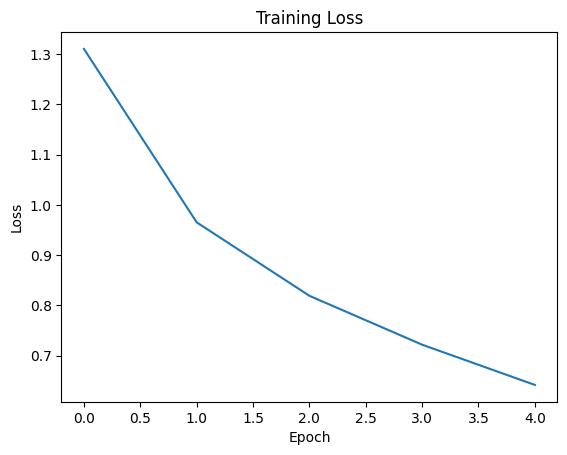

In [11]:
from tqdm import tqdm
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
train_losses = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}")
    model.train()
    running_loss = 0.0
    batch = 1
    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        batch += 1
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Plot training loss
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")